This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Deep learning for timeseries

## Different kinds of timeseries tasks

## A temperature-forecasting example

In [1]:
#!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

In [2]:
# !unzip jena_climate_2009_2016.csv.zip

**Inspecting the data of the Jena weather dataset**

In [3]:
import os
fname = os.path.join("C:/Users/19483887/projects/datasets/jena_climate_2009_2016/jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print()
print(len(lines))
print()
for i in range(10):
    print(lines[i])
print()    
for i, line in enumerate(lines[:10]):
    print(i, line)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

420451

01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,26

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

**Parsing the data**

In [5]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [6]:
print(temperature[:18])

[-8.02 -8.41 -8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76 -8.88
 -8.85 -8.83 -8.66 -8.66 -8.7  -8.81]


In [7]:
print(raw_data[:18, :])

[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01  1.89000e+00  3.03000e+00
   1.30980e+03  7.20000e-01  1.50000e+00  1.36100e+02]
 [ 9.96530e+02 -8.51000e+00  2.64910e+02 -9.31000e+00  9.39000e+01
   3.21000e+00  3.01000e+00  2.00000e-01  1.88000e+00  3.02000e+00
   1.31024e+03  1.90000e-01  6.30000e-01  1.71600e+02]
 [ 9.96510e+02 -8.31000e+00  2.65120e+02 -9.07000e+00  9.42000e+01
   3.26000e+00  3.07000e+00  1.90000e-01  1.92000e+00  3.08000e+00
   1.30919e+03  3.40000e-01  5.00000e-01  1.98000e+02]
 [ 9.96510e+02 -8.27000e+00  2.65150e+02 -9.04000e+00  9.41000e+01
   3.27000e+00  3.08000e+00  1.90000e-01  1.92000e+00  3.09000e+00
   1.30900e+03  3.20000e-01  6.30000e-01  2.14300e+02]
 [ 9.96500e+02 -8.05000e+00  2.65380e+02 -8.78000e+00  

**Plotting the temperature timeseries**

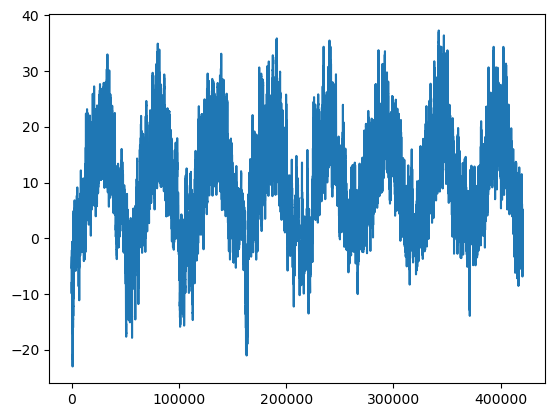

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

**Plotting the first 10 days of the temperature timeseries**

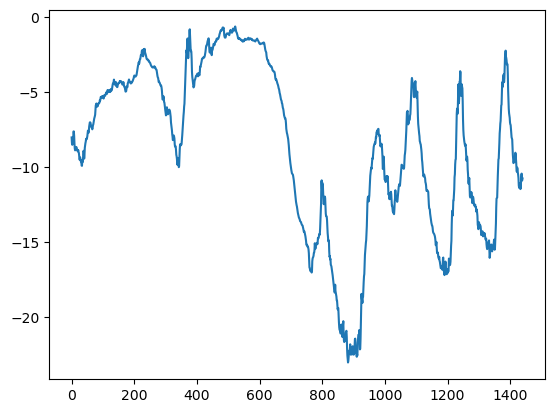

In [9]:
plt.plot(range(1440), temperature[:1440])

**Computing the number of samples we'll use for each data split**

In [10]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


### Preparing the data

In [11]:
import numpy as np
from tensorflow import keras

In [12]:
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

In [13]:
for inputs, targets in dummy_dataset:
    print(inputs, targets)

tf.Tensor(
[[0 1 2]
 [1 2 3]], shape=(2, 3), dtype=int32) tf.Tensor([3 4], shape=(2,), dtype=int32)
tf.Tensor(
[[2 3 4]
 [3 4 5]], shape=(2, 3), dtype=int32) tf.Tensor([5 6], shape=(2,), dtype=int32)
tf.Tensor([[4 5 6]], shape=(1, 3), dtype=int32) tf.Tensor([7], shape=(1,), dtype=int32)


In [14]:
for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**Instantiating dataset for training, firstly without shuffling for inspecting purpose**

In [15]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [16]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False, ########## will be changed with True
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

**Inspecting the output of one of our datasets**

In [17]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
    
print("len of train_dataset:", len(train_dataset))

samples shape: (256, 120, 14)
targets shape: (256,)
len of train_dataset: 819


**Inspecting the dataset**

In [18]:
819*256

209664

In [19]:
for samples, targets in train_dataset:
    print(samples)
    print(targets)
    break

tf.Tensor(
[[[ 9.96520e+02 -8.02000e+00  2.65400e+02 ...  1.03000e+00  1.75000e+00
    1.52300e+02]
  [ 9.96500e+02 -7.62000e+00  2.65810e+02 ...  1.80000e-01  6.30000e-01
    1.66500e+02]
  [ 9.96630e+02 -8.85000e+00  2.64570e+02 ...  1.60000e-01  5.00000e-01
    1.58300e+02]
  ...
  [ 9.96580e+02 -1.03200e+01  2.63100e+02 ...  2.79000e+00  4.38000e+00
    1.44400e+01]
  [ 9.97040e+02 -1.07400e+01  2.62640e+02 ...  2.74000e+00  3.75000e+00
    2.28600e+01]
  [ 9.97420e+02 -1.19600e+01  2.61390e+02 ...  2.12000e+00  3.38000e+00
    2.77000e+00]]

 [[ 9.96570e+02 -8.41000e+00  2.65010e+02 ...  7.20000e-01  1.50000e+00
    1.36100e+02]
  [ 9.96500e+02 -7.62000e+00  2.65810e+02 ...  1.90000e-01  5.00000e-01
    1.18600e+02]
  [ 9.96740e+02 -8.83000e+00  2.64580e+02 ...  3.60000e-01  6.30000e-01
    1.84800e+02]
  ...
  [ 9.96710e+02 -1.04100e+01  2.63000e+02 ...  2.40000e+00  4.38000e+00
    1.65300e+01]
  [ 9.97110e+02 -1.08800e+01  2.62500e+02 ...  2.54000e+00  4.00000e+00
    1.83300e+

In [20]:
print(samples[0, :10])

tf.Tensor(
[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96500e+02 -7.62000e+00  2.65810e+02 -8.30000e+00  9.48000e+01
   3.44000e+00  3.26000e+00  1.80000e-01  2.04000e+00  3.27000e+00
   1.30568e+03  1.80000e-01  6.30000e-01  1.66500e+02]
 [ 9.96630e+02 -8.85000e+00  2.64570e+02 -9.70000e+00  9.35000e+01
   3.12000e+00  2.92000e+00  2.00000e-01  1.82000e+00  2.93000e+00
   1.31211e+03  1.60000e-01  5.00000e-01  1.58300e+02]
 [ 9.96870e+02 -8.84000e+00  2.64560e+02 -9.69000e+00  9.35000e+01
   3.13000e+00  2.92000e+00  2.00000e-01  1.83000e+00  2.93000e+00
   1.31237e+03  7.00000e-02  2.50000e-01  1.29300e+02]
 [ 9.97050e+02 -9.23000e+00  2.64150e+02 -1.02500e+01  9.22000e+01
   3.03000e+00  2.79000e+00  2.40000e-01  1.74000e+00  2.80000e+00
   1.31462e+03  1.00000e-01  3.80000e-01  2.03900e+02]
 [ 9.97430e+02 -9.67000e+00  2.63680e+02 -1.

In [21]:
print(samples[6, :10])

tf.Tensor(
[[ 9.96500e+02 -7.62000e+00  2.65810e+02 -8.30000e+00  9.48000e+01
   3.44000e+00  3.26000e+00  1.80000e-01  2.04000e+00  3.27000e+00
   1.30568e+03  1.80000e-01  6.30000e-01  1.66500e+02]
 [ 9.96630e+02 -8.85000e+00  2.64570e+02 -9.70000e+00  9.35000e+01
   3.12000e+00  2.92000e+00  2.00000e-01  1.82000e+00  2.93000e+00
   1.31211e+03  1.60000e-01  5.00000e-01  1.58300e+02]
 [ 9.96870e+02 -8.84000e+00  2.64560e+02 -9.69000e+00  9.35000e+01
   3.13000e+00  2.92000e+00  2.00000e-01  1.83000e+00  2.93000e+00
   1.31237e+03  7.00000e-02  2.50000e-01  1.29300e+02]
 [ 9.97050e+02 -9.23000e+00  2.64150e+02 -1.02500e+01  9.22000e+01
   3.03000e+00  2.79000e+00  2.40000e-01  1.74000e+00  2.80000e+00
   1.31462e+03  1.00000e-01  3.80000e-01  2.03900e+02]
 [ 9.97430e+02 -9.67000e+00  2.63680e+02 -1.06300e+01  9.26000e+01
   2.93000e+00  2.71000e+00  2.20000e-01  1.69000e+00  2.72000e+00
   1.31735e+03  3.60000e-01  7.50000e-01  1.32500e+02]
 [ 9.97810e+02 -9.59000e+00  2.63740e+02 -1.

**Normalizing the data**

In [22]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

**Instantiating datasets for training, validation, and testing.**

In [23]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

### A common-sense, non-machine-learning baseline

**Computing the common-sense baseline MAE**

In [24]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


### Let's try a basic machine-learning model

**Training and evaluating a densely connected model**

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 16s 19ms/step - loss: 13.2992 - mae: 2.8268 - val_loss: 13.4975 - val_mae: 2.9281
Epoch 2/10
819/819 [==============================] - 14s 18ms/step - loss: 9.4577 - mae: 2.4176 - val_loss: 11.4617 - val_mae: 2.6851
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 8.5730 - mae: 2.3087 - val_loss: 9.9660 - val_mae: 2.4775
Epoch 4/10
819/819 [==============================] - 15s 18ms/step - loss: 8.1092 - mae: 2.2476 - val_loss: 10.3159 - val_mae: 2.5307
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 7.7314 - mae: 2.1974 - val_loss: 12.9077 - val_mae: 2.8530
Epoch 6/10
819/819 [==============================] - 17s 21ms/step - loss: 7.4757 - mae: 2.1620 - val_loss: 12.2917 - val_mae: 2.7539
Epoch 7/10
819/819 [==============================] - 20s 24ms/step - loss: 7.2473 - mae: 2.1297 - val_loss: 11.0551 - val_mae: 2.6070
Epoch 8/10
819/819 [==============================] - 2

**Plotting results**

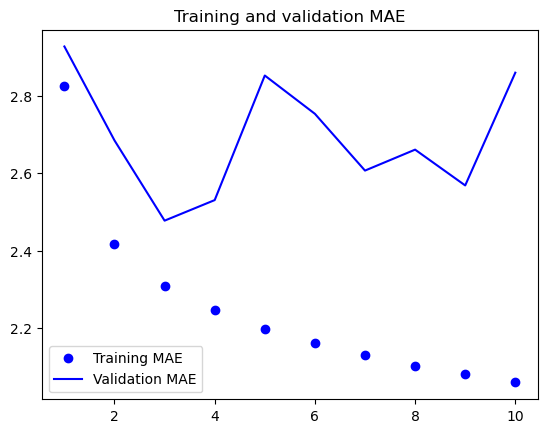

In [26]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Let's try a 1D convolutional model

In [27]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 92s 111ms/step - loss: 23.3197 - mae: 3.7756 - val_loss: 14.9681 - val_mae: 3.0679
Epoch 2/10
819/819 [==============================] - 92s 113ms/step - loss: 16.9516 - mae: 3.2223 - val_loss: 13.2209 - val_mae: 2.8607
Epoch 3/10
819/819 [==============================] - 90s 110ms/step - loss: 14.5048 - mae: 2.9977 - val_loss: 14.6163 - val_mae: 3.0138
Epoch 4/10
819/819 [==============================] - 115s 140ms/step - loss: 13.2999 - mae: 2.8811 - val_loss: 13.6894 - val_mae: 2.8987
Epoch 5/10
819/819 [==============================] - 117s 142ms/step - loss: 12.5963 - mae: 2.8028 - val_loss: 13.5233 - val_mae: 2.8897
Epoch 6/10
819/819 [==============================] - 94s 115ms/step - loss: 12.0497 - mae: 2.7434 - val_loss: 13.6011 - val_mae: 2.8955
Epoch 7/10
819/819 [==============================] - 91s 111ms/step - loss: 11.5891 - mae: 2.6884 - val_loss: 16.2304 - val_mae: 3.1669
Epoch 8/10
819/819 [===================

### A first recurrent baseline

**A simple LSTM-based model**

In [29]:
raw_data.shape

(420451, 14)

In [28]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 88s 103ms/step - loss: 44.0365 - mae: 4.8583 - val_loss: 13.4222 - val_mae: 2.7910
Epoch 2/10
819/819 [==============================] - 83s 101ms/step - loss: 11.3127 - mae: 2.6122 - val_loss: 9.9756 - val_mae: 2.4576
Epoch 3/10
819/819 [==============================] - 82s 101ms/step - loss: 9.8629 - mae: 2.4481 - val_loss: 9.9555 - val_mae: 2.4552
Epoch 4/10
819/819 [==============================] - 82s 100ms/step - loss: 9.3991 - mae: 2.3807 - val_loss: 9.7901 - val_mae: 2.4289
Epoch 5/10
819/819 [==============================] - 81s 99ms/step - loss: 9.0874 - mae: 2.3423 - val_loss: 9.9482 - val_mae: 2.4385
Epoch 6/10
819/819 [==============================] - 80s 98ms/step - loss: 8.8252 - mae: 2.3078 - val_loss: 10.2156 - val_mae: 2.4721
Epoch 7/10
819/819 [==============================] - 81s 99ms/step - loss: 8.5246 - mae: 2.2706 - val_loss: 9.9215 - val_mae: 2.4471
Epoch 8/10
819/819 [==============================] - 

## Understanding recurrent neural networks

**NumPy implementation of a simple RNN**

In [30]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

### A recurrent layer in Keras

**An RNN layer that can process sequences of any length**

In [31]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

**An RNN layer that returns only its last output step**

In [32]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

(None, 16)


**An RNN layer that returns its full output sequence**

In [33]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 16)


**Stacking RNN layers**

In [34]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## Advanced use of recurrent neural networks

### Using recurrent dropout to fight overfitting

**Training and evaluating a dropout-regularized LSTM**

In [35]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/50
819/819 [==============================] - 250s 301ms/step - loss: 28.4412 - mae: 3.9303 - val_loss: 9.9955 - val_mae: 2.4475
Epoch 2/50
819/819 [==============================] - 277s 338ms/step - loss: 14.8319 - mae: 2.9936 - val_loss: 9.4373 - val_mae: 2.3795
Epoch 3/50
819/819 [==============================] - 275s 336ms/step - loss: 14.0395 - mae: 2.9014 - val_loss: 9.4975 - val_mae: 2.3810
Epoch 4/50
819/819 [==============================] - 270s 330ms/step - loss: 13.3459 - mae: 2.8249 - val_loss: 9.2784 - val_mae: 2.3585
Epoch 5/50
819/819 [==============================] - 273s 333ms/step - loss: 12.8778 - mae: 2.7773 - val_loss: 9.4612 - val_mae: 2.3859
Epoch 6/50
819/819 [==============================] - 269s 328ms/step - loss: 12.5039 - mae: 2.7398 - val_loss: 9.3546 - val_mae: 2.3642
Epoch 7/50
819/819 [==============================] - 268s 327ms/step - loss: 12.2320 - mae: 2.7083 - val_loss: 9.4428 - val_mae: 2.3852
Epoch 8/50
819/819 [=====================

In [36]:
model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 28s 67ms/step - loss: 10.4477 - mae: 2.5762
Test MAE: 2.58


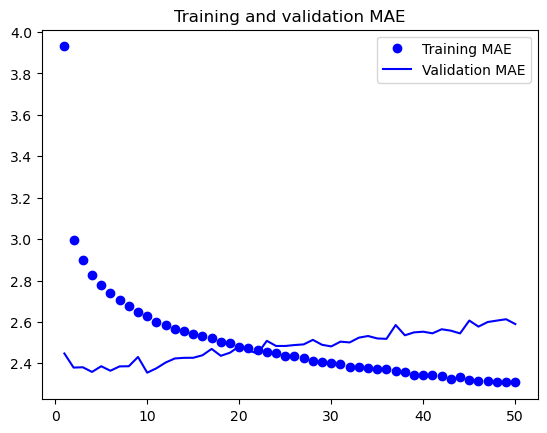

In [37]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [39]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### Stacking recurrent layers

**Training and evaluating a dropout-regularized, stacked GRU model**

In [40]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 524s 633ms/step - loss: 23.6912 - mae: 3.6048 - val_loss: 9.2900 - val_mae: 2.3533
Epoch 2/50
819/819 [==============================] - 508s 621ms/step - loss: 13.9568 - mae: 2.8951 - val_loss: 9.3808 - val_mae: 2.3785
Epoch 3/50
819/819 [==============================] - 477s 582ms/step - loss: 13.0872 - mae: 2.8054 - val_loss: 9.1271 - val_mae: 2.3397
Epoch 4/50
819/819 [==============================] - 469s 572ms/step - loss: 12.5443 - mae: 2.7481 - val_loss: 8.9415 - val_mae: 2.3192
Epoch 5/50
819/819 [==============================] - 469s 573ms/step - loss: 12.1705 - mae: 2.7073 - val_loss: 9.1590 - val_mae: 2.3503
Epoch 6/50
819/819 [==============================] - 470s 574ms/step - loss: 11.7888 - mae: 2.6590 - val_loss: 9.7925 - val_mae: 2.4290
Epoch 7/50
819/819 [==============================] - 474s 578ms/step - loss: 11.3976 - mae: 2.6205 - val_loss: 8.8166 - val_mae: 2.3140
Epoch 8/50
819/819 [=====================

### Using bidirectional RNNs

**Training and evaluating a bidirectional LSTM**

In [41]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
819/819 [==============================] - 145s 160ms/step - loss: 27.6936 - mae: 3.7754 - val_loss: 10.8947 - val_mae: 2.5659
Epoch 2/10
819/819 [==============================] - 123s 149ms/step - loss: 9.5467 - mae: 2.4091 - val_loss: 9.7275 - val_mae: 2.4091
Epoch 3/10
819/819 [==============================] - 129s 158ms/step - loss: 8.6605 - mae: 2.2886 - val_loss: 9.7893 - val_mae: 2.4099
Epoch 4/10
819/819 [==============================] - 121s 148ms/step - loss: 8.2116 - mae: 2.2284 - val_loss: 9.7520 - val_mae: 2.4195
Epoch 5/10
819/819 [==============================] - 126s 154ms/step - loss: 7.7733 - mae: 2.1710 - val_loss: 10.0319 - val_mae: 2.4513
Epoch 6/10
819/819 [==============================] - 123s 150ms/step - loss: 7.3948 - mae: 2.1208 - val_loss: 10.5220 - val_mae: 2.4862
Epoch 7/10
819/819 [==============================] - 124s 151ms/step - loss: 7.1056 - mae: 2.0778 - val_loss: 10.6186 - val_mae: 2.5058
Epoch 8/10
819/819 [=======================

### Going even further

## Summary